In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import ParameterGrid

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from yellowbrick.regressor import ResidualsPlot, PredictionError

import pickle

## Carregando os dadasets

In [46]:
X_train = pd.read_csv('../data/X_train.csv')
y_train = pd.read_csv('../data/y_train.csv').squeeze()

X_test = pd.read_csv('../data/X_test.csv')
y_test = pd.read_csv('../data/y_test.csv').squeeze()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'-' * 27)
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (11591, 59)
y_train shape: (11591,)
---------------------------
X_test shape: (4968, 59)
y_test shape: (4968,)


## Criando e treinando o módelo de "produção"

Utilizando AdaboostRegressor que foi o módelo escolhido no gridsearch

In [47]:
prod_model = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=3), loss='square')
prod_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=3),
                  loss='square')

## Salvando o módelo

In [50]:
with open('../models/model.pkl', 'wb') as f: 
    pickle.dump(prod_model, f)

## Avaliando o módelo

/home/enacom/.virtualenvs/py3cv4/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


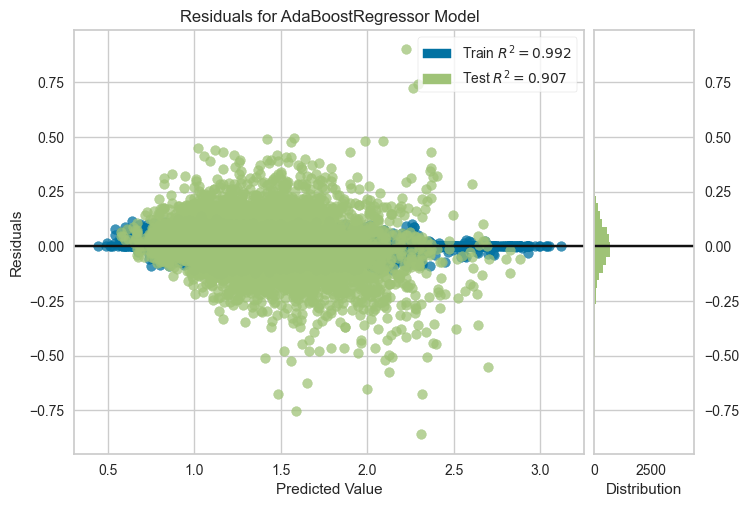

<AxesSubplot: title={'center': 'Residuals for AdaBoostRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [48]:
visualizer = ResidualsPlot(prod_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/home/enacom/.virtualenvs/py3cv4/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


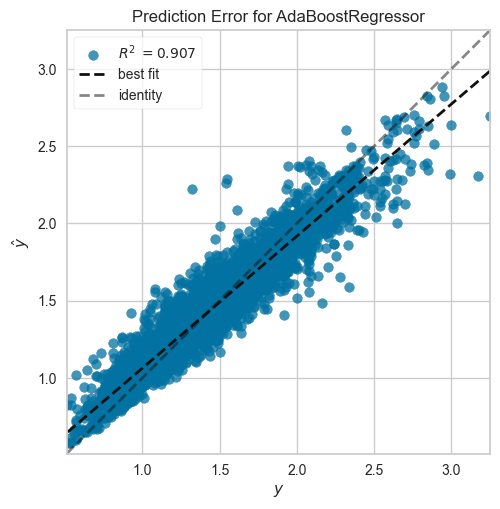

<AxesSubplot: title={'center': 'Prediction Error for AdaBoostRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
visualizer = PredictionError(prod_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [57]:
y_pred = prod_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}\nMSE: {mse}\nR2: {r2}')

MAE: 0.0904428341384863
MSE: 0.015377876185364106
R2: 0.9067379139204551
